In [1]:
import xarray as xr

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


In [2]:
from pathlib import Path

datadir = Path("/Users/awindled/Documents/Simulated_OCI_data")
datafile = datadir / "PACE_HARP2.20220321T165000.L1C.5.2KM.V02.nc"

In [3]:
df = xr.open_dataset(datafile)
df

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes: (12/60)
    title:                              HARP2 Level-1C Data
    instrument:                         HARP2
    product_name:                       PACE_HARP2.20220321T165000.L1C.5.2KM....
    processing_level:                   1C
    processing_version:                 V02
    hipp_version:                       v2.4
    ...                                 ...
    rt_simulation_institute:            PACE SDS
    rt_simulation_date:                 Nov 27, 2022
    rt_simulation_dataset:              I, DoLP
    rt_simulation_version:              v1.3.1
    rt_simulation_software:             fastmapol v2.0
    rt_simulation_status:               Finished

In [5]:
obs_dat = xr.open_dataset(datafile, group='observation_data')
obs_dat

<xarray.Dataset>
Dimensions:               (number_of_views: 90, bins_along_track: 395,
                           bins_across_track: 457)
Dimensions without coordinates: number_of_views, bins_along_track,
                                bins_across_track
Data variables: (12/15)
    obs_per_view          (number_of_views, bins_along_track, bins_across_track) float32 ...
    QC_bitwise            (number_of_views, bins_along_track, bins_across_track) float32 ...
    QC                    (number_of_views, bins_along_track, bins_across_track) float32 ...
    QC_polsample_bitwise  (number_of_views, bins_along_track, bins_across_track) float32 ...
    QC_polsample          (number_of_views, bins_along_track, bins_across_track) float32 ...
    I                     (number_of_views, bins_along_track, bins_across_track) float32 ...
    ...                    ...
    AOLP                  (number_of_views, bins_along_track, bins_across_track) float32 ...
    I_noise               (number_of_views, bins_along_track, bins_across_track) float32 ...
    Q_noise               (number_of_views, bins_along_track, bins_across_track) float32 ...
    U_noise               (number_of_views, bins_along_track, bins_across_track) float32 ...
    DOLP_noise            (number_of_views, bins_along_track, bins_across_track) float32 ...
    AOLP_noise            (number_of_views, bins_along_track, bins_across_track) float32 ...
Attributes:
    Title:    Data observed by the HARP2 instrument

In [12]:
obs_dat.I.shape

(90, 395, 457)

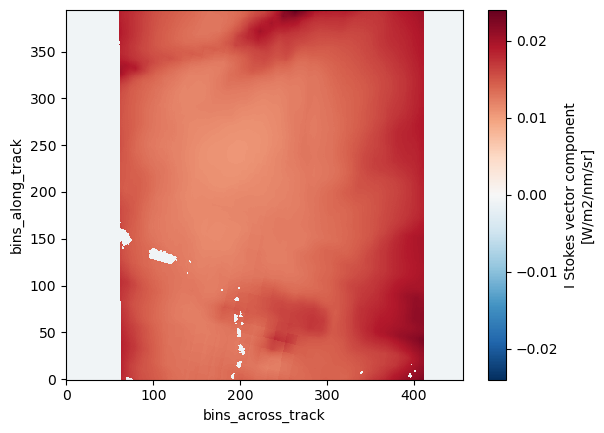

In [11]:
obs_dat.I[50,:,:].plot()

In [6]:
sensor_view_bnds = xr.open_dataset(datafile, group='sensor_views_bands')
sensor_view_bnds

<xarray.Dataset>
Dimensions:                   (number_of_views: 90,
                               intensity_bands_per_view: 1,
                               polarization_bands_per_view: 1)
Dimensions without coordinates: number_of_views, intensity_bands_per_view,
                                polarization_bands_per_view
Data variables:
    view_angles               (number_of_views) float32 ...
    intensity_wavelengths     (intensity_bands_per_view, number_of_views) float32 ...
    intensity_bandpasses      (intensity_bands_per_view, number_of_views) float32 ...
    intensity_F0              (intensity_bands_per_view, number_of_views) float32 ...
    polarization_wavelengths  (polarization_bands_per_view, number_of_views) float32 ...
    polarization_bandpasses   (polarization_bands_per_view, number_of_views) float32 ...
    polarization_F0           (polarization_bands_per_view, number_of_views) float32 ...
Attributes:
    Title:    Time information of sensor views and spectral bands

In [7]:
geo_data = xr.open_dataset(datafile, group='geolocation_data')
geo_data

<xarray.Dataset>
Dimensions:               (bins_along_track: 395, bins_across_track: 457,
                           number_of_views: 90)
Dimensions without coordinates: bins_along_track, bins_across_track,
                                number_of_views
Data variables:
    longitude             (bins_along_track, bins_across_track) float32 ...
    latitude              (bins_along_track, bins_across_track) float32 ...
    altitude              (bins_along_track, bins_across_track) float32 ...
    altitude_variability  (bins_along_track, bins_across_track) float32 ...
    sensor_zenith         (number_of_views, bins_along_track, bins_across_track) float32 ...
    sensor_azimuth        (number_of_views, bins_along_track, bins_across_track) float32 ...
    solar_zenith          (number_of_views, bins_along_track, bins_across_track) float32 ...
    solar_azimuth         (number_of_views, bins_along_track, bins_across_track) float32 ...
    scattering_angle      (number_of_views, bins_along_track, bins_across_track) float32 ...
Attributes:
    Title:             Grid geolocation and geometry
    center_latitude:   22.483150482177734
    center_longitude:  -61.55694580078125